In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leitura do Twitch_global_data.csv

In [73]:
data = pd.read_csv('Twitch_global_data.csv')

data.rename(columns={
    'year':'ano',
    'Month':'mes',
    'Hours_watched':'horas_assistidas',
    'Avg_viewers':'media_visualizacoes',
    'Peak_viewers':'pico_de_visualizacoes',
    'Avg_channels':'media_canais',
    'Games_streamed':'jogos_transmitidos',
    'Viewer_ratio':'proporcao_de_espectadores',
}, inplace=True)

data.tail()

,ano,mes,horas_assistidas,media_visualizacoes,pico_de_visualizacoes,Streams,media_canais,jogos_transmitidos,proporcao_de_espectadores
80,2022,9,1817119612,2527287,4678056,22278079,90376,41863,28.37
81,2022,10,1883320673,2534751,4610799,22867973,90557,42164,28.35
82,2022,11,1694262814,2356415,5362892,21744817,88195,41058,26.84
83,2022,12,1674092138,2253152,3866814,21753674,84728,41548,27.00
84,2023,1,1866962462,2512735,5593050,24429476,93349,43611,27.44


## Pré tratamento de dados (global)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ano                        85 non-null     int64  
 1   mes                        85 non-null     int64  
 2   horas_assistidas           85 non-null     int64  
 3   media_visualizacoes        85 non-null     int64  
 4   pico_de_visualizacoes      85 non-null     int64  
 5   Streams                    85 non-null     int64  
 6   media_canais               85 non-null     int64  
 7   jogos_transmitidos         85 non-null     int64  
 8   proporcao_de_espectadores  85 non-null     float64
dtypes: float64(1), int64(8)
memory usage: 6.1 KB


In [75]:
data.isnull().sum()

ano                          0
mes                          0
horas_assistidas             0
media_visualizacoes          0
pico_de_visualizacoes        0
Streams                      0
media_canais                 0
jogos_transmitidos           0
proporcao_de_espectadores    0
dtype: int64

## Leitura do Twitch_game_data.csv

In [109]:
data_games = pd.read_csv('Twitch_game_data.csv', encoding='latin1')
data_games.rename(columns={
    'Game':'jogo',
    'Month':'mes',
    'Year':'ano',
    'Hours_watched':'horas_assistidas',
    'Hours_Streamed':'horas_transmitidas',
    'Peak_viewers':'pico_de_visualizacoes',
    'Peak_channels':'pico_de_canais',
    'Avg_viewers':'media_de_espectadores',
    'Avg_channels':'media_canais',
    'Avg_viewer_ratio':'media_de_proporção_de_espectadores',
}, inplace=True)
data_games.head()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [77]:
data_games.tail()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
16995,196,Tom Clancy's The Division 2,1,2023,666943(118.3%),97138(59.5%),2759(49.9%),249(48.2%),12805(68.1%),897(118.2%),130(60.5%),6.87(36.9%)
16996,197,Persona 5 Royal,1,2023,664503(-2.9%),68310(2.7%),10494(19.6%),198(4.8%),7475(4.8%),894(-2.9%),91(2.2%),9.73(-5.4%)
16997,198,Bloodborne,1,2023,663078(59.1%),45522(31.8%),9455(30.4%),117(8.3%),8355(27.5%),892(59.3%),61(32.6%),14.57(20.7%)
16998,199,PowerWash Simulator,1,2023,657644(356.0%),18494(53.7%),63757(473.9%),192(346.5%),6589(42.3%),885(356.2%),24(50%),35.56(196.6%)
16999,200,Eternal Return,1,2023,642217(2.4%),24245(7.7%),9933(16.7%),97(15.5%),1997(6.2%),864(2.5%),32(6.7%),26.49(-4.9%)


## Pré tratamento de dados (game)

In [78]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              17000 non-null  int64 
 1   Game              16999 non-null  object
 2   Month             17000 non-null  int64 
 3   Year              17000 non-null  int64 
 4   Hours_watched     17000 non-null  object
 5   Hours_Streamed    17000 non-null  object
 6   Peak_viewers      17000 non-null  object
 7   Peak_channels     17000 non-null  object
 8   Streamers         17000 non-null  object
 9   Avg_viewers       17000 non-null  object
 10  Avg_channels      17000 non-null  object
 11  Avg_viewer_ratio  17000 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [110]:
data_games[data_games['jogo'].isnull()]

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
7561,162,NaN,2,2019,317951,77004 hours,30919,5804,21758,473,114,4.13


### Conversão para numéricos

In [111]:
#Limpa os valores que estão entre parênteses e converte para inteiro Ex: 542342(12.0%) String -> [542342 , 12.0%)] list -> 542342 inteiro
data_games['horas_assistidas'] = data_games.loc[:,'horas_assistidas'].str.split('(').apply(lambda lista: lista[0]).astype('int')
data_games['pico_de_visualizacoes'] = data_games.loc[:,'pico_de_visualizacoes'].str.split('(').apply(lambda lista: lista[0]).astype('int')
data_games['pico_de_canais'] = data_games.loc[:,'pico_de_canais'].str.split('(').apply(lambda lista: lista[0]).astype('int')
data_games['Streamers'] = data_games.loc[:,'Streamers'].str.split('(').apply(lambda lista: lista[0]).astype('int')

In [112]:
#Limpa os valores que estão entre parênteses Ex: 542342(12.0%) String -> [542342 , 12.0%)] list -> [542342] string dentro de uma lista
data_games['horas_transmitidas'] = data_games.loc[:, 'horas_transmitidas'].str.split('(').apply(lambda lista: lista[0])
#Verifica valores não numéricos e os retira da string, converte a string restante em inteiro Ex: 231456 hours string -> 231456 string -> 231456 inteiro
data_games['horas_transmitidas'] = data_games['horas_transmitidas'].replace(to_replace=r'[^0-9]', value='', regex=True).astype(int)

In [113]:
#Limpa os valores que estão entre parênteses e converte para float Ex: 470(15.0%) String -> [470 , 15.0%)] list -> 470 float
data_games['media_de_espectadores'] = data_games.loc[:,'media_de_espectadores'].str.split('(').apply(lambda lista: lista[0]).astype('float')
data_games['media_canais'] = data_games.loc[:,'media_canais'].str.split('(').apply(lambda lista: lista[0]).astype('float')
data_games['media_de_proporção_de_espectadores'] = data_games.loc[:,'media_de_proporção_de_espectadores'].str.split('(').apply(lambda lista: lista[0]).astype('float')

In [114]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rank                                17000 non-null  int64  
 1   jogo                                16999 non-null  object 
 2   mes                                 17000 non-null  int64  
 3   ano                                 17000 non-null  int64  
 4   horas_assistidas                    17000 non-null  int32  
 5   horas_transmitidas                  17000 non-null  int32  
 6   pico_de_visualizacoes               17000 non-null  int32  
 7   pico_de_canais                      17000 non-null  int32  
 8   Streamers                           17000 non-null  int32  
 9   media_de_espectadores               17000 non-null  float64
 10  media_canais                        17000 non-null  float64
 11  media_de_proporção_de_espectadores  17000

In [115]:
data_games.head()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378.0,1117.0,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815.0,583.0,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749.0,317.0,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740.0,1549.0,14.03


In [116]:
data_games.tail()

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
16995,196,Tom Clancy's The Division 2,1,2023,666943,97138,2759,249,12805,897.0,130.0,6.87
16996,197,Persona 5 Royal,1,2023,664503,68310,10494,198,7475,894.0,91.0,9.73
16997,198,Bloodborne,1,2023,663078,45522,9455,117,8355,892.0,61.0,14.57
16998,199,PowerWash Simulator,1,2023,657644,18494,63757,192,6589,885.0,24.0,35.56
16999,200,Eternal Return,1,2023,642217,24245,9933,97,1997,864.0,32.0,26.49


## Análise do Top 1 de cada mês

In [117]:
data_games[data_games['Rank'] == 1]

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
200,1,League of Legends,2,2016,93154772,1266715,475784,2712,117996,134035.0,1822.0,73.54
400,1,League of Legends,3,2016,94514511,1264029,599114,2585,117734,127206.0,1701.0,74.77
600,1,League of Legends,4,2016,88389049,1217250,553165,2945,113251,122933.0,1692.0,72.61
800,1,League of Legends,5,2016,80679320,1196096,433005,2635,118593,108585.0,1609.0,67.45
...,...,...,...,...,...,...,...,...,...,...,...,...
16000,1,Just Chatting,9,2022,249025325,2874872,859041,6280,529973,346349.0,3998.0,86.62
16200,1,Just Chatting,10,2022,242960233,2945016,741825,6112,521547,326998.0,3963.0,82.50
16400,1,Just Chatting,11,2022,239755926,2671266,809381,6480,469749,333457.0,3715.0,89.75
16600,1,Just Chatting,12,2022,254521690,2801321,992439,7645,468778,342559.0,3770.0,90.86


### Just Chatting

ano
2018     141303847
2019     759733055
2020    1995891029
2021    3020771657
2022    3139111208
2023    3170554872
Name: horas_assistidas, dtype: int64


Text(0.5, 1.0, 'Horas assistidas de Just Chatting')

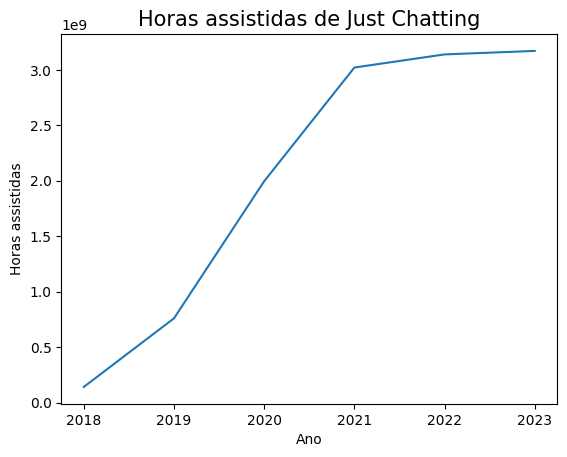

In [118]:
#dataframe com informações apenas do Just Chatting
df_just = data_games[data_games['jogo'] == 'Just Chatting']
ser_just_hours = df_just.groupby(['ano'])['horas_assistidas'].sum()
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_just_hours[2023] = ser_just_hours[2023]*12
print(ser_just_hours)
#gráfico Horas assistidas de Just Chatting x ano
plt.plot(ser_just_hours.index, ser_just_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas assistidas de Just Chatting', size=15)

In [119]:
#Horas assistidas do Just Chatting (2018-2023)
horas_just = df_just['horas_assistidas'].sum()
#Total de horas assistidas no geral (2018-2023)
horas_total = sum(data.groupby(['ano'])['horas_assistidas'].sum()[2:])
#Razão de horas do just chatting em relação ao total de horas (2018-2023)
print(f'\nA razão é de {horas_just/horas_total:.4f}, o que corresponde a uma porcentagem de {(horas_just/horas_total)*100:.2f} %\n ')


A razão é de 0.1062, o que corresponde a uma porcentagem de 10.62 %
 


ano
2016          NaN
2017          NaN
2018     1.508153
2019     6.906534
2020    10.726575
2021    12.412927
2022    13.890819
2023    14.152020
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre o Just Chatting e o Total')

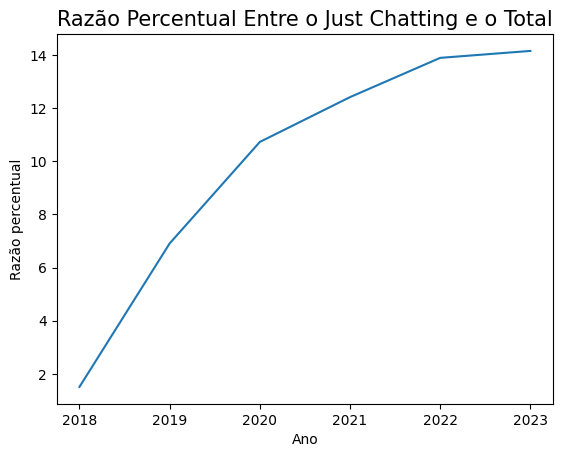

In [120]:
#Razão ano a ano em porcentagem
ser_just_ratio = (df_just.groupby(['ano'])['horas_assistidas'].sum())*100/(data.groupby(['ano'])['horas_assistidas'].sum())
print(ser_just_ratio)
#Gráfico da razão percentual do Just Chatting em relação ao total de horas assistidas (2018-2023)
plt.plot(ser_just_ratio.index, ser_just_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre o Just Chatting e o Total', size=15)

## Análise de jogos

### League of legends

In [121]:
#verificação da versão principal de League of legends
data_games[data_games['jogo'].str.contains('League of Legends') == True]['jogo'].value_counts()

League of Legends                         85
League of Legends: Wild Rift              28
Ruined King: A League of Legends Story     1
Name: jogo, dtype: int64

ano
2016    1035469850
2017    1022398595
2018     985380685
2019    1118435546
2020    1553536532
2021    1735661105
2022    1556699612
2023     126494155
Name: horas_assistidas, dtype: int32


Text(0.5, 1.0, 'Horas Assistidas de League of Legends')

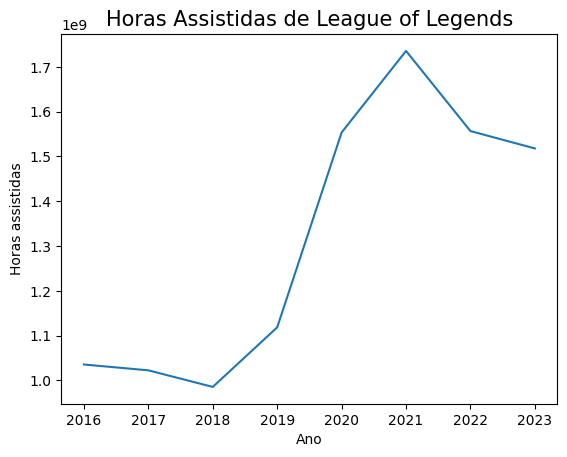

In [122]:
#criação de um dataframe com informações apenas de League of legends
df_lol = data_games[data_games['jogo'] == 'League of Legends']
#quantidade de horas assistidas em cada ano
ser_lol_hours = df_lol.groupby(['ano'])['horas_assistidas'].sum()
print(ser_lol_hours)
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_lol_hours[2023] = ser_lol_hours[2023]*12
#gráfico Horas assistidas de League of legenda a cada ano
plt.plot(ser_lol_hours.index, ser_lol_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas Assistidas de League of Legends', size=15)

ano
2016    19.642783
2017    15.648362
2018    10.517087
2019    10.167405
2020     8.349216
2021     7.132163
2022     6.888521
2023     6.775399
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre League of Legends e o Total')

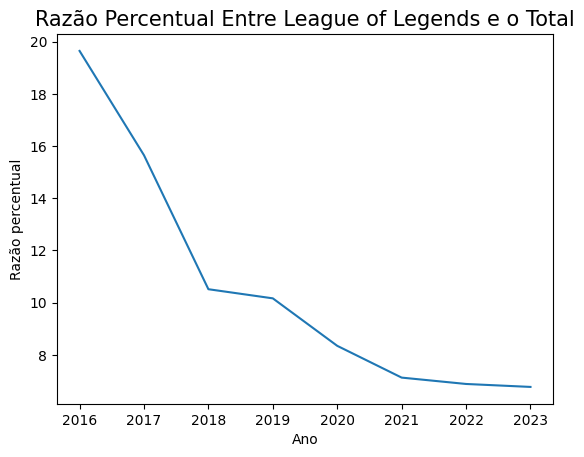

In [123]:
#comparação em relação às horas assistidas no total
ser_lol_ratio = ((df_lol.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum()))*100
print(ser_lol_ratio)
#Gráfico da razão percentual do League of Legends em relação ao total de horas assistidas (2018-2023)
plt.plot(ser_lol_ratio.index, ser_lol_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre League of Legends e o Total', size=15)

In [94]:
#Redução percentual no mercado da Twitch de 2016 para 2023
red = (1-(ser_lol_ratio[2023]/ser_lol_ratio[2016]))*100
print(f'Redução percentual de {red:.2f} %')

Redução percentual de 65.51 %


In [124]:
#comparação em relação às horas assistidas no total desconsiderando-se o Just Chatting
((df_lol.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum() - df_just.groupby(['ano'])['horas_assistidas'].sum()))*100

ano
2016          NaN
2017          NaN
2018    10.678130
2019    10.921717
2020     9.352410
2021     8.142940
2022     7.999752
2023     7.892322
Name: horas_assistidas, dtype: float64

### Dota


In [125]:
#verificação da versão principal de dota
data_games[data_games['jogo'].str.contains('Dota') == True]['jogo'].value_counts()

Dota 2             85
Dota Underlords     9
Name: jogo, dtype: int64

ano
2016    496585969
2017    449879503
2018    472414819
2019    503022570
2020    497151335
2021    578484298
2022    532253215
2023     43317513
Name: horas_assistidas, dtype: int32


Text(0.5, 1.0, 'Horas Assistidas de Dota')

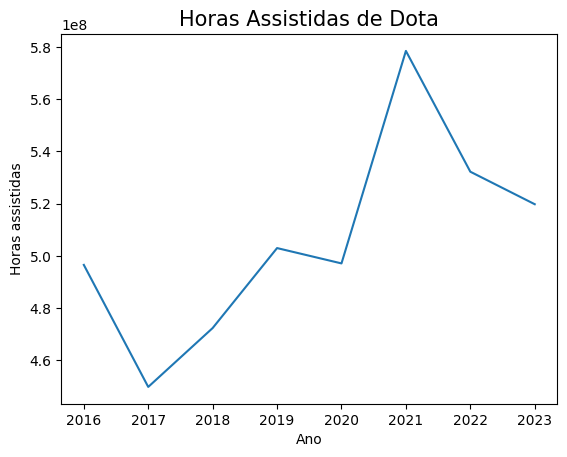

In [126]:
#criação de um dataframe com informações apenas de Dota 2
df_dota = data_games[data_games['jogo'] == 'Dota 2']
#quantidade de horas assistidas em cada ano
ser_dota_hours = df_dota.groupby(['ano'])['horas_assistidas'].sum()
print(ser_dota_hours)
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_dota_hours[2023] = ser_dota_hours[2023]*12
#gráfico Horas assistidas de League of legenda a cada ano
plt.plot(ser_dota_hours.index, ser_dota_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas Assistidas de Dota', size=15)

ano
2016    9.420197
2017    6.885649
2018    5.042141
2019    4.572846
2020    2.671855
2021    2.377102
2022    2.355263
2023    2.320213
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre Dota e o Total')

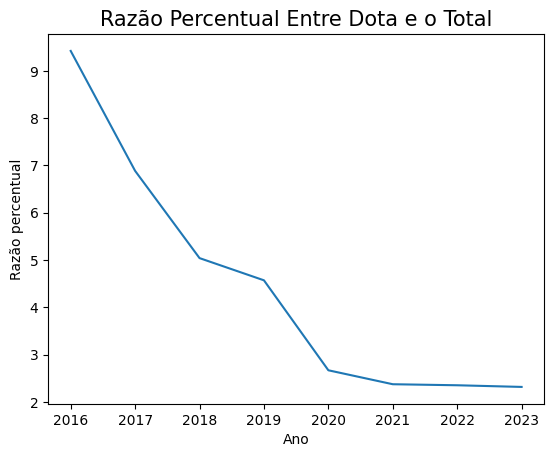

In [127]:
#comparação em relação às horas assistidas no total
ser_dota_ratio = ((df_dota.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum()))*100
print(ser_dota_ratio)
#Gráfico da razão percentual do Dota em relação ao total de horas assistidas (2018-2023)
plt.plot(ser_dota_ratio.index, ser_dota_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre Dota e o Total', size=15)

In [128]:
#Redução percentual no mercado da Twitch de 2016 para 2023
red = (1-(ser_dota_ratio[2023]/ser_dota_ratio[2016]))*100
print(f'Redução percentual de {red:.2f} %')

Redução percentual de 75.37 %


In [129]:
#comparação em relação às horas assistidas no total desconsiderando-se o Just Chatting
((df_dota.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum() - df_just.groupby(['ano'])['horas_assistidas'].sum()))*100

ano
2016         NaN
2017         NaN
2018    5.119348
2019    4.912103
2020    2.992889
2021    2.713988
2022    2.735206
2023    2.702700
Name: horas_assistidas, dtype: float64

## Jogos Top 20 (Desconsiderando o Just Chatting)

In [130]:
#Dataframe com o top20 de todos os meses, considerando o Just Chatting
lista_rank = np.arange(1,21)
df_top20 = data_games[data_games['Rank'].isin(lista_rank)]
#Dataframe que identifica o Just Chatting no top20 para removê-lo e colocar um jogo no lugar
df_append = df_top20[df_top20['jogo'].isin(['Just Chatting'])].loc[ : , ['mes', 'ano']]
#Remoção do Just Chatting e acréscimo do jogo de rank 21 do respectivo mês
for tupla in df_append.itertuples():
    df_temp = data_games[(data_games['Rank'] == 21) & (data_games['mes'] == tupla[1]) & (data_games['ano'] == tupla[2])]
    df_top20 = pd.concat([df_top20, df_temp])
    df_top20 = df_top20.drop(tupla[0])
#Dataframe com o top20 de todos os meses, desconsiderando o Just Chatting
df_top20

,Rank,jogo,mes,ano,horas_assistidas,horas_transmitidas,pico_de_visualizacoes,pico_de_canais,Streamers,media_de_espectadores,media_canais,media_de_proporção_de_espectadores
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021.0,1833.0,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378.0,1117.0,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815.0,583.0,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749.0,317.0,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740.0,1549.0,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
16020,21,NBA 2K23,9,2022,16458374,829449,352152,7180,97382,22890.0,1153.0,19.84
16220,21,Special Events,10,2022,15015700,52937,1045462,781,13223,20209.0,71.0,283.65
16420,21,Teamfight Tactics,11,2022,14417524,173705,102291,586,26384,20052.0,241.0,83.00
16620,21,Dead by Daylight,12,2022,16803010,1048716,56226,2910,103748,22615.0,1411.0,16.02


ano
2016     3919168020
2017     4497288304
2018     6315112988
2019     6785334250
2020    10618343719
2021    12971194955
2022    11490627552
2023      937276137
Name: horas_assistidas, dtype: int64


Text(0.5, 1.0, 'Horas Assistidas de Top 20 jogos')

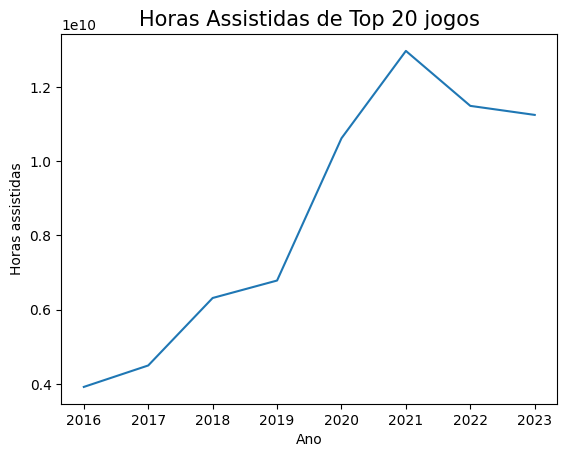

In [131]:
#Quantidade de horas assistidas por ano (top20 jogos)
ser_top20_hours = df_top20.groupby(['ano'])['horas_assistidas'].sum()
print(ser_top20_hours)
#para 2023 o mês de Janeiro será considerado como a média do ano
ser_top20_hours[2023] = ser_top20_hours[2023]*12
#gráfico Horas assistidas de Top20 a cada ano
plt.plot(ser_top20_hours.index, ser_top20_hours.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Horas assistidas', size=10)
plt.title('Horas Assistidas de Top 20 jogos', size=15)

ano
2016    74.346313
2017    68.833425
2018    67.401966
2019    61.683697
2020    57.066473
2021    53.301114
2022    50.846950
2023    50.203266
Name: horas_assistidas, dtype: float64


Text(0.5, 1.0, 'Razão Percentual Entre os Top 20 jogos e o Total')

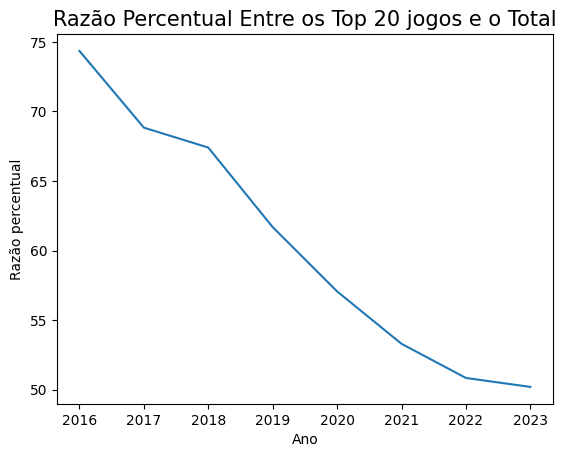

In [132]:
#comparação em relação às horas assistidas no total
ser_top20_ratio = ((df_top20.groupby(['ano'])['horas_assistidas'].sum())/(data.groupby(['ano'])['horas_assistidas'].sum()))*100
print(ser_top20_ratio)
#Gráfico da razão percentual do top20 jogos em relação ao total de horas assistidas (2016-2023)
plt.plot(ser_top20_ratio.index, ser_top20_ratio.values)
plt.xlabel('Ano', size=10)
plt.ylabel('Razão percentual', size=10)
plt.title('Razão Percentual Entre os Top 20 jogos e o Total', size=15)

In [133]:
#Redução percentual no mercado da Twitch de 2016 para 2023 (top20)
red = (1-(ser_top20_ratio[2023]/ser_top20_ratio[2016]))*100
print(f'Redução percentual de {red:.2f} %')

Redução percentual de 32.47 %


In [134]:
#Quantidade de horas assistidas separadas por ano (top20 jogos)
horas_top20 = df_top20['horas_assistidas'].sum()
#Quantidade de horas assistidas total (2016-2023)
horas_total = data['horas_assistidas'].sum()
#Razão de horas do top20 em relação ao total de horas
print(f'\nA razão é de {horas_top20/horas_total:.4f}, o que corresponde a uma porcentagem de {(horas_top20/horas_total)*100:.2f} %\n ')


A razão é de 0.5778, o que corresponde a uma porcentagem de 57.78 %
 
